<a href="https://colab.research.google.com/github/codeboy47/Netflix-movies-and-tv-shows-clustering/blob/main/Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [485]:
# Import package
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [486]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [487]:
# Import Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [488]:
## Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [489]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

In [490]:
# loading csv File
file_path = '/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df = pd.read_csv(file_path, index_col = False)

In [491]:
# printing shape of the dataset
print("Shape of the Dataset:", netflix_df.shape)

Shape of the Dataset: (7787, 12)


In [492]:
# Using head function to get first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [493]:
# using tail with a transpose to get the view of columns
netflix_df.tail().T

,7782,7783,7784,7785,7786
show_id,s7783,s7784,s7785,s7786,s7787
type,Movie,Movie,Movie,TV Show,Movie
title,Zozo,Zubaan,Zulu Man in Japan,Zumbo's Just Desserts,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
director,Josef Fares,Mozez Singh,NaN,NaN,Sam Dunn
cast,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Nasty C,"Adriano Zumbo, Rachel Khoo",NaN
country,"Sweden, Czech Republic, United Kingdom, Denmar...",India,NaN,Australia,"United Kingdom, Canada, United States"
date_added,"October 19, 2020","March 2, 2019","September 25, 2020","October 31, 2020","March 1, 2020"
release_year,2005,2015,2019,2019,2019
rating,TV-MA,TV-14,TV-MA,TV-PG,TV-MA
duration,99 min,111 min,44 min,1 Season,90 min


In [494]:
# get the info of datasets
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [495]:
# checking if any null values are present in our dataset
count_of_null_values = netflix_df.isnull().sum()
count_of_null_values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

As we can see:
* director column has 2389 null values
* cast column has 718 null values
* country column has 507 null values
* date_added column has 10 null values
* rating column has 7 null values

In [496]:
# Unique values for each column
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [497]:
# checking duplicates in our dataset
value = len(netflix_df[netflix_df.duplicated()])
print("Total no. of duplicates = ", value)

Total no. of duplicates =  0


#### As we can see there are no duplicates present in our dataset

In [498]:
# Setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style = 'darkgrid')

In [499]:
# Function for plotting varoius graphs using sns
def create_sns_plot(plot_name, x_name, y_name, data_name, palette_color, title, xlabel, ylabel, hue_name = None):
  fig, ax = plt.subplots(figsize = (20, 8))

  # creating plot by assigning values to the sns parameters
  plot_name(x = x_name, y = y_name, hue = hue_name, data = data_name, palette = palette_color)
  # set title
  plt.title(title, fontsize = 20)
  # set xlabel
  plt.xlabel(xlabel, fontsize = 15)
  # set ylabel
  plt.ylabel(ylabel, fontsize = 15)

<br>

# **Understanding the features of our dataset**

### Finding the number of unique shows in the dataset

In [500]:
# no. of unique users
netflix_df['show_id'].nunique()

7787

In [501]:
# no. of records
netflix_df.shape[0]

7787

Inference: <br>
As we can see, the number of unique shows is same as the total number of observations.

In [502]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

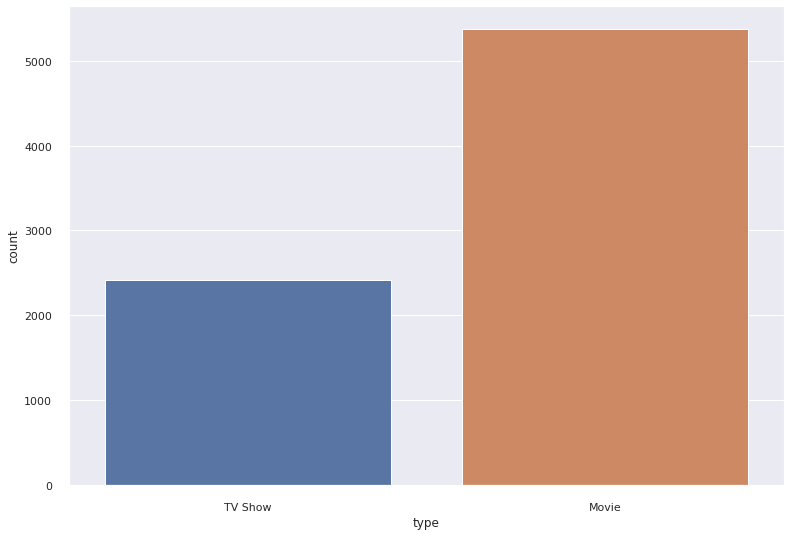

In [503]:
# count plot for type column
sns.countplot(x = netflix_df['type'])

Inference: Movies are more in number compared to TV shows on Netflix.

## Top 10 directors with most number of movies

In [504]:
# Getting top 10 director-wise count of movie/shows
year_count = netflix_df.groupby(['director'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'frequency'})[0:10]
year_count

,director,frequency
3078,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
2388,Martin Scorsese,12
1604,Jay Chapman,12
4007,Youssef Chahine,12
3599,Steven Spielberg,10
875,David Dhawan,9
3262,Ryan Polito,8


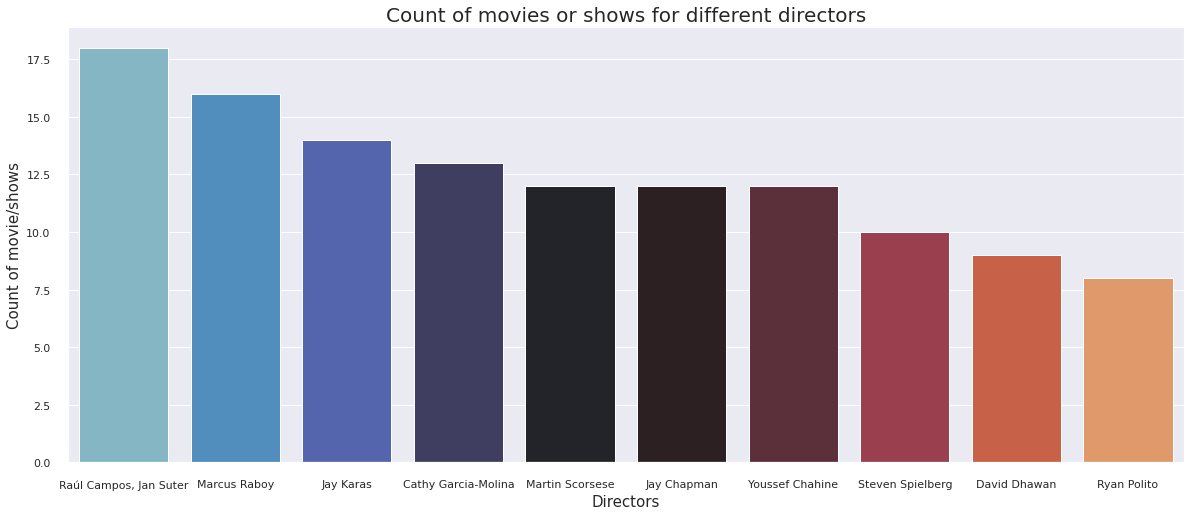

In [505]:
# calling create_sns_plot function to plot bar graph
create_sns_plot(sns.barplot, 'director', 'frequency', year_count, 'icefire', 'Count of movies or shows for different directors', 'Directors', 'Count of movie/shows')

Inference: Raúl Campos, Jan Suter have directed the most number of movies followed by Marcus Raboy.

## Is Netflix has increasingly focusing on TV shows rather than movies in recent years?

In [506]:
# Getting year-wise count of movies
movie_df = netflix_df[netflix_df['type'] == 'Movie']
movie_count_per_year = movie_df.groupby(['release_year'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'movies'})

In [507]:
# Getting year-wise count of tv shows
tv_show_df = netflix_df[netflix_df['type'] == 'TV Show']
tv_show_count_per_year = tv_show_df.groupby(['release_year'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'tv_shows'})

In [508]:
# merging dataframes by inner join
inner_df = pd.merge(movie_count_per_year, tv_show_count_per_year, how = 'inner', on = 'release_year')[:10]
inner_df

,release_year,movies,tv_shows
0,2017,744,268
1,2018,734,387
2,2016,642,240
3,2019,582,414
4,2020,411,457
5,2015,382,159
6,2014,244,90
7,2013,202,65
8,2012,158,61
9,2010,136,37


In [509]:
# convert to long (tidy) form
dfm = inner_df.melt('release_year', var_name = 'count', value_name = 'vals')

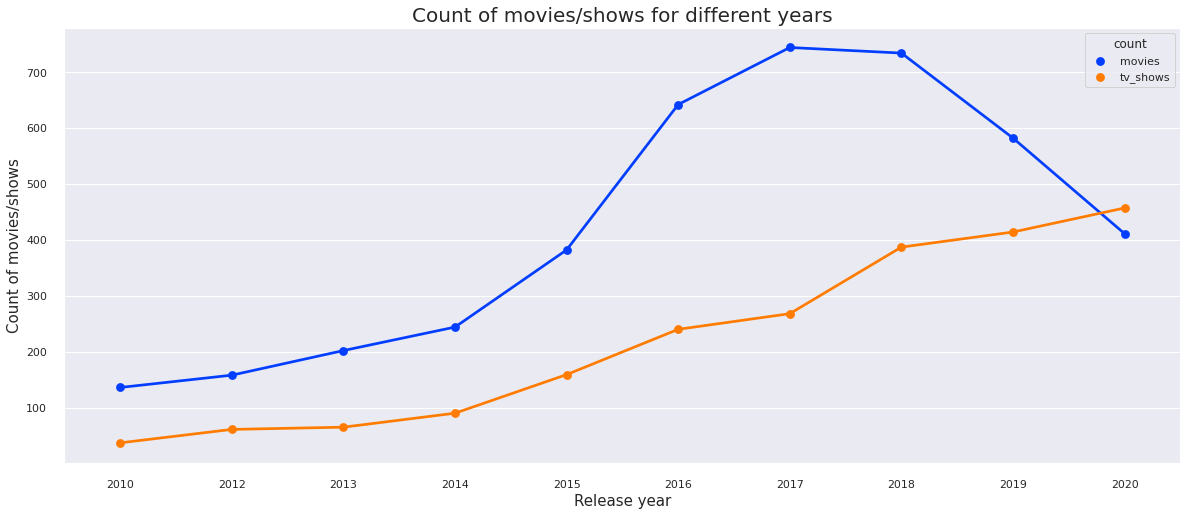

In [510]:
# calling create_sns_plot function to plot line graph
create_sns_plot(sns.pointplot, 'release_year', 'vals', dfm, sns.color_palette('bright'), 'Count of movies/shows for different years', 'Release year', 'Count of movies/shows', 'count')

Inference:
* Highest number of movies and tv shows were released in 2017 and 2020 respectively.
* With each year number of tv shows keeps on increasing.
* There is not much difference in the number of movies that were released in the years 2017 and 2018.
* In 2020 we see a dip in movies and an increase in tv shows due to Covid.

<br>

#### Hence from the above line plot, we deduce that Netflix has increasingly focusing on TV shows rather than movies in recent years.

## Understanding what type(movie or tv shows) is available in different countries


In [511]:
# Getting country-wise count of movies
movies_location_count = movie_df.groupby(['country'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'movies'})

In [512]:
# Getting country-wise count of tv shows
tv_shows_location_count = tv_show_df.groupby(['country'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'tv_shows'})

In [513]:
# merging dataframes using inner join to get top 10 countries with most number of movies and tv shows
inner_df = pd.merge(movies_location_count, tv_shows_location_count, how = 'inner', on = 'country')[:10]
inner_df

,country,movies,tv_shows
0,United States,1850,705
1,India,852,71
2,United Kingdom,193,204
3,Canada,118,59
4,Spain,89,45
5,Egypt,89,12
6,Turkey,73,27
7,Philippines,70,1
8,France,69,46
9,Japan,69,157


In [514]:
# convert to long (tidy) form
dfm = inner_df.melt('country', var_name = 'type', value_name = 'vals')

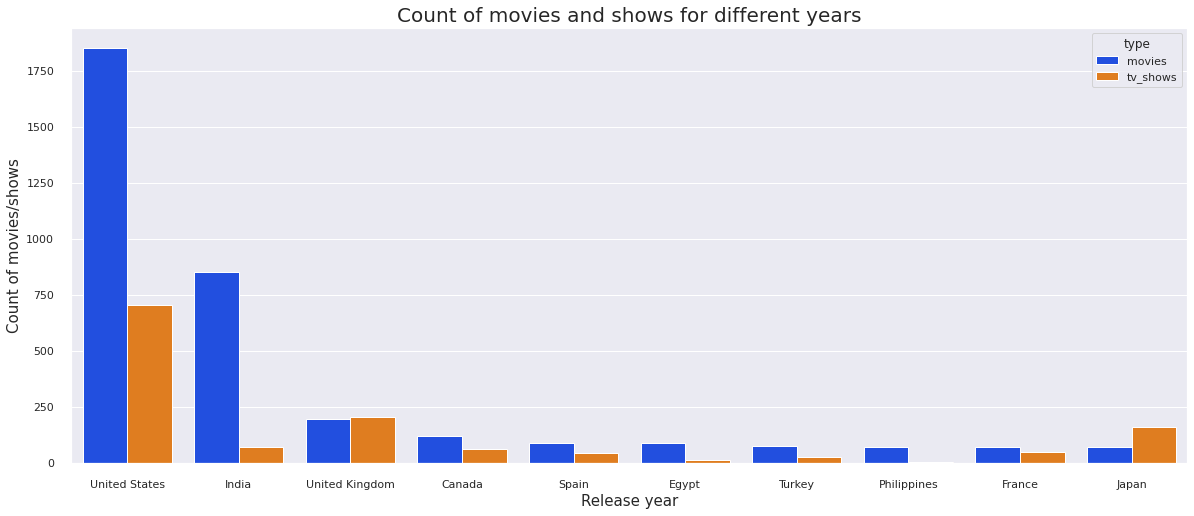

In [515]:
# calling create_sns_plot function to plot double bar graph
create_sns_plot(sns.barplot, 'country', 'vals', dfm, sns.color_palette('bright'), 'Count of movies and shows for different years', 'Release year', 'Count of movies/shows', 'type')

Inference: <br>
* United States has the highest number of movies and shows.
* India is second in terms of movie count.
* For the United Kingdom count of movies and tv shows are same.

## Top 10 actors that acted in most number of movies

In [516]:
# Function to create dictionary that contains actors as key and count of movies as value
def fetching_actor_names(list_of_actors):

  # initializing empty dictionary and list of actors
  actors_dict = {}
  actor_list = []

  # creating list of actors
  for actors_string in list_of_actors:
    # pushing each actor name into a list
    actor_list.extend(str(actors_string).split(', '))

  # iterating the list of actors
  for actor in actor_list:
      # checking if actor is present in a list
      if actor in actors_dict.keys():
        actors_dict[actor] += 1
      # if actor is not present set the value as 1
      else:
        actors_dict[actor] = 1
  
  # popping the null value
  actors_dict.pop('nan')
  #returning the dictionary
  return actors_dict
  
actors_dict = fetching_actor_names(list(netflix_df['cast']))

In [517]:
# converting dictionary of actors into a dataframe
actor_df = pd.DataFrame(list(actors_dict.items()), columns = ['actor_name', 'movie_count'])

In [518]:
# fetching top 10 actors that acted in most number of movies
actors_top_10 = actor_df.sort_values('movie_count', ascending = False)[:10]
actors_top_10

,actor_name,movie_count
1290,Anupam Kher,42
3987,Shah Rukh Khan,35
714,Naseeruddin Shah,30
2191,Om Puri,30
2189,Akshay Kumar,29
193,Takahiro Sakurai,29
1996,Amitabh Bachchan,27
2488,Paresh Rawal,27
4099,Yuki Kaji,27
737,Boman Irani,27


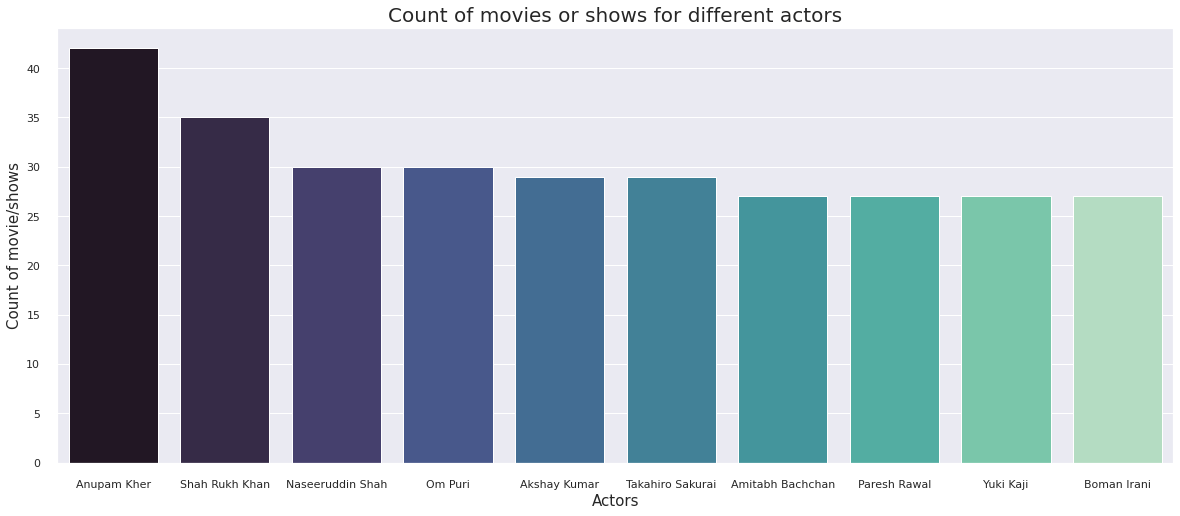

In [519]:
# calling create_sns_plot function to plot bar graph
create_sns_plot(sns.barplot, 'actor_name', 'movie_count', actors_top_10, 'mako', 'Count of movies or shows for different actors', 'Actors', 'Count of movie/shows')

Inference:
Anupam Kher	has acted in the most number of films and TV shows.

## Which rating has the most number of movies/tv shows on Netflix?





In [520]:
# Rating-wise count of movie/shows
rating_count = netflix_df.groupby(['rating'], as_index = False).agg({'show_id': 'count'}).sort_values('show_id', ascending = False).rename(columns = {'show_id' : 'frequency'})[:10]
rating_count

,rating,frequency
8,TV-MA,2863
6,TV-14,1931
9,TV-PG,806
5,R,665
4,PG-13,386
10,TV-Y,280
11,TV-Y7,271
3,PG,247
7,TV-G,194
2,NR,84


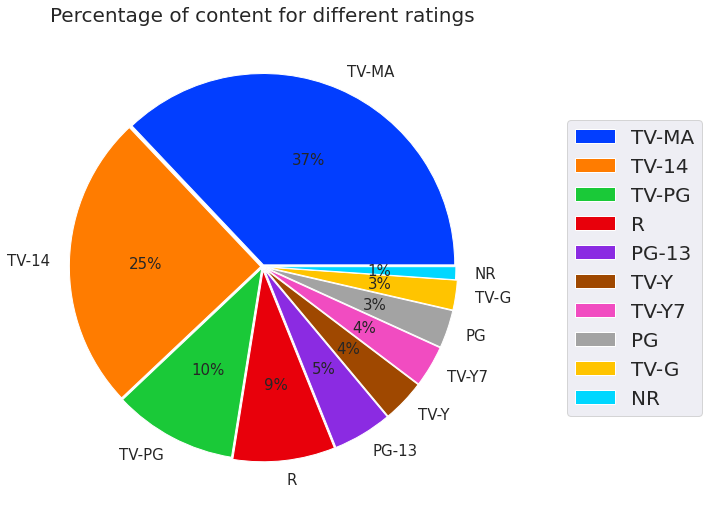

In [521]:
# plotting the pie chart
graph = rating_count.plot.pie(
    y = 'frequency',
    labels = rating_count['rating'],
    colors = sns.color_palette('bright'),
    autopct = '%.0f%%',
    explode = [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01],
    fontsize = 15
)
graph.set_title('Percentage of content for different ratings', fontsize = 20)
graph.set_ylabel('')
plt.legend(bbox_to_anchor = (1,0.5), loc="center right", fontsize = 20, bbox_transform=plt.gcf().transFigure)

Inference: <br>
We can clearly see from the pie plot that most of the content on Netflix is for **mature audiences**.






# Wordcloud for genres

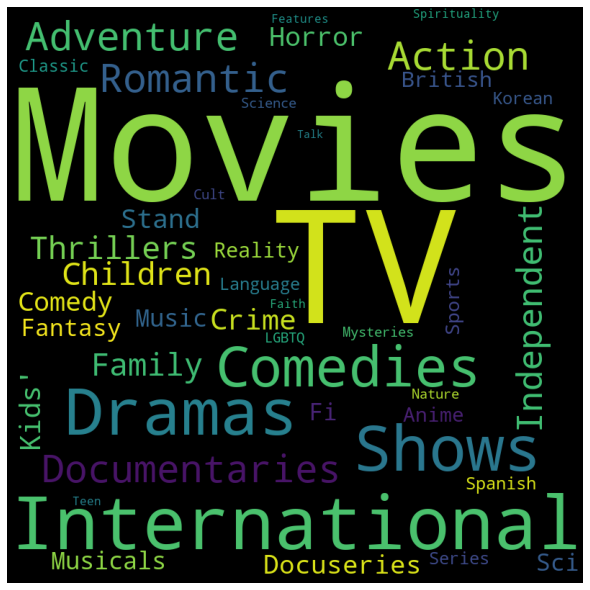

In [522]:
# Creating a string of words present in all the listed_in columnn
total_words = ''
for text in netflix_df['listed_in']:
    total_words += ' '.join([word for word in text.split()]) + ' '

# Generating a word cloud image
wordcloud = WordCloud(collocations = False, width = 800, height = 800, background_color = 'black', min_font_size = 10).generate(total_words)

# Displaying the generated word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### We can see some common genres like romantic, documentaries, dramas and comedies from the wordcloud.

## <b> Text Pre-processing </b>

In [523]:
# filling the missing values with an empty string
netflix_df['director'] = netflix_df['director'].fillna('')
netflix_df['cast'] = netflix_df['cast'].fillna('')
netflix_df['country'] = netflix_df['country'].fillna('')
netflix_df['rating'] = netflix_df['rating'].fillna('')

In [535]:
# selecting the columns for clustering
netflix_df['appended_text'] = netflix_df['description'] + ' ' + netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['country'] + ' ' + netflix_df['rating'] + ' ' + netflix_df['listed_in']

In [536]:
netflix_df['appended_text']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: appended_text, Length: 7787, dtype: object

### Removing punctuation

In [537]:
# Writing a function which removes punctuation from our data
def remove_punc(text):
  no_punc = [char for char in text if char not in string.punctuation]
  return ''.join(no_punc)

In [538]:
netflix_df['tokenized_text'] = netflix_df['appended_text'].apply(remove_punc)

In [539]:
netflix_df[['appended_text', 'tokenized_text']].head()

,appended_text,tokenized_text
0,In a future where the elite inhabit an island ...,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow...",When an army recruit is found dead his fellow ...
3,"In a postapocalyptic world, rag-doll robots hi...",In a postapocalyptic world ragdoll robots hide...
4,A brilliant group of students become card-coun...,A brilliant group of students become cardcount...


### Removing stopwords

In [529]:
# Writing a function which removes stopwords from our data
def remove_stopwords(text):
    no_stop_words = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(no_stop_words)

In [540]:
netflix_df['tokenized_text'] = netflix_df['tokenized_text'].apply(remove_stopwords)

In [541]:
netflix_df[['appended_text', 'tokenized_text']].head()

,appended_text,tokenized_text
0,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,After a devastating earthquake hits Mexico Cit...,devastating earthquake hits Mexico City trappe...
2,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldiers forced...
3,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robots hide fear...
4,A brilliant group of students become card-coun...,brilliant group students become cardcounting e...


### Stemming - 
Cropping words for space optimization. We will use SnowballStemmer for that.

In [542]:
# Creating an object of SnowballStemmer
stemmer = SnowballStemmer("english")

# Function for stemming each word of the given text
def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

In [543]:
netflix_df['tokenized_text'] = netflix_df['tokenized_text'].apply(stemming)

In [544]:
netflix_df[['appended_text', 'tokenized_text']].head()

,appended_text,tokenized_text
0,In a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...
1,After a devastating earthquake hits Mexico Cit...,devast earthquak hit mexico citi trap survivor...
2,"When an army recruit is found dead, his fellow...",armi recruit found dead fellow soldier forc co...
3,"In a postapocalyptic world, rag-doll robots hi...",postapocalypt world ragdol robot hide fear dan...
4,A brilliant group of students become card-coun...,brilliant group student becom cardcount expert...


## <b> Vectorization </b>

In [547]:
# creating an object of TfidfVectorizer
tf_idf = TfidfVectorizer(max_df = 0.9, min_df = 10)

In [548]:
# applying tf idf to training and test data
X = tf_idf.fit_transform(netflix_df['tokenized_text'])

In [549]:
print(len(tf_idf.get_feature_names()))

4379
